In [1]:
#No68(Ward法によるクラスタリング)
from gensim.models import keyedvectors
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
with open('/content/drive/MyDrive/GoogleNews-vectors.pkl', 'rb') as f:
    model = pickle.load(f)

#No67の利用
countries = []
countries_name = []
vec_countries = []
with open('/content/drive/MyDrive/countries_name.csv', 'r', encoding='utf-8_sig') as f:
    for line in f:
      # 改行を削除
        country = line.rstrip()
        #リストに追加
        countries.append(country)
 # ヘッダの削除(指定した値を削除できる.また削除した値を取得できる)
countries.pop(0)

# モデルに含まれる国名のみを抽出(try except でも可)
for country in countries:
    if country in model:
        countries_name.append(country)
        vec_countries.append(model[country])  # 単語ベクトルの取得



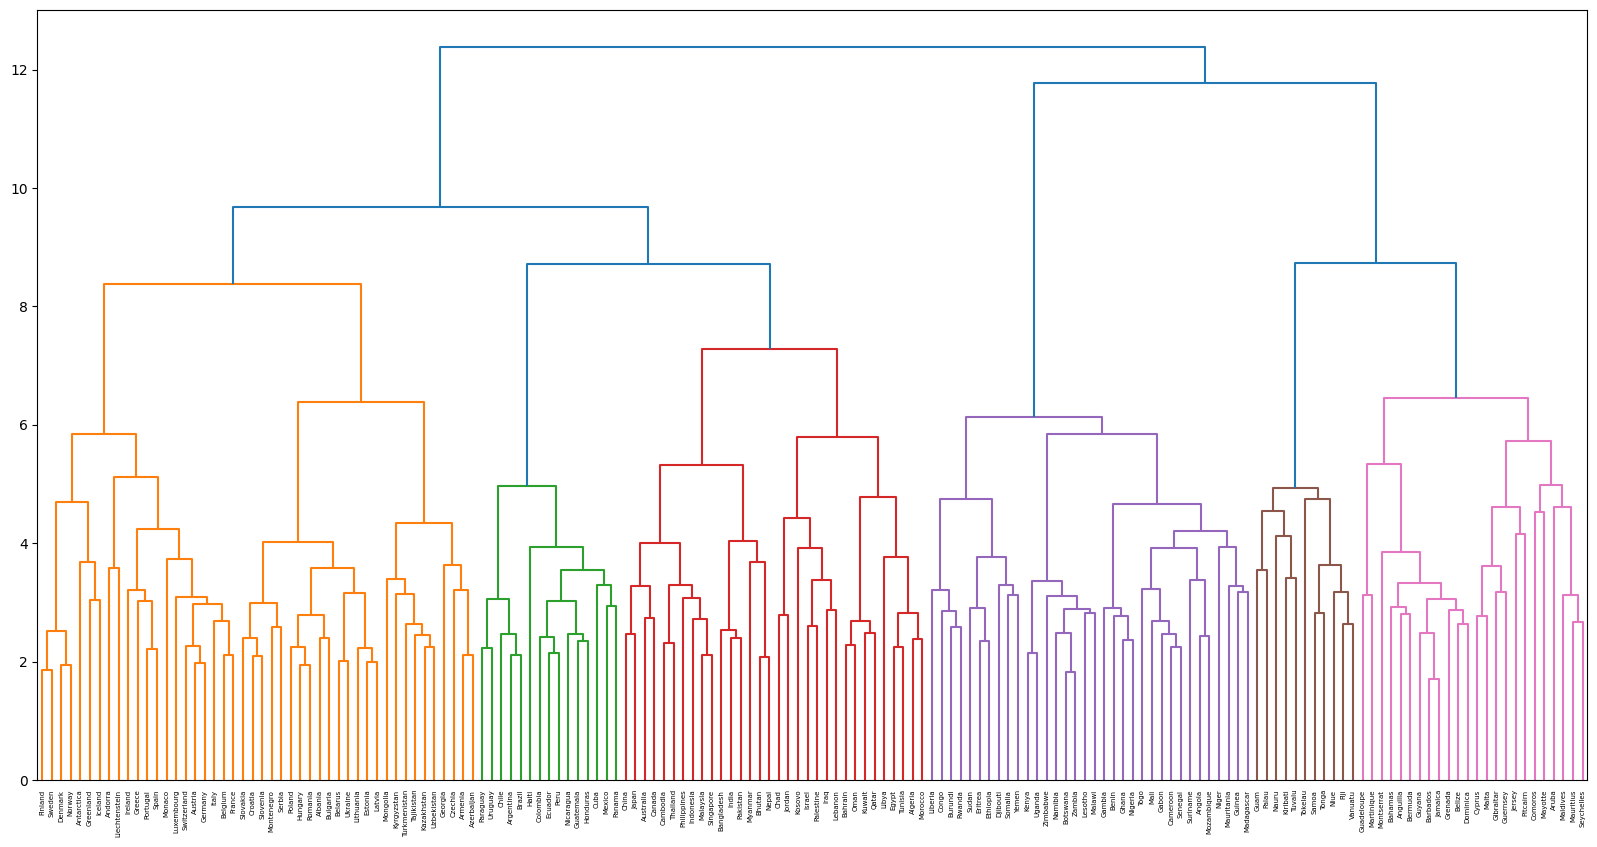

In [2]:
# 階層型クラスタリングの実行
# linkage...凝縮型クラスタリングのメソッド、
#Xに座標データを入力、結合手順を示したリストZを返す
# Z = linkage(X, 'method_name')
# https://www.goodnalife.com/entry/2021/06/13/080000 (クラスター分析を分かりやすく解説してくれるサイト)
Z = linkage(vec_countries, method='ward')


# デンドログラムの描画(クラスター同士の距離が可視化される)
plt.figure(figsize=(20, 10))
# Zに結合手順を示すリスト、labelsに葉のラベルのリスト
dendrogram(Z, labels=countries_name)
plt.savefig('/content/drive/MyDrive/output68.png')
plt.show()